Hi, 
Welcome to this Notebook. 
This Notebook will provide knowledge of the Machine Learning concepts like -

Exploratory Data Ananlysis (EDA)

Cross Validation 

Grid Search

Prediction and Model selection

This notebook uses the Red Wine Quality Dataset and the Dataset csv file is attached in the same folder.

The Problem statement is, client need to generalise the quality of the wine into two classes either 'bad' or 'good'.
To do this we need to convert the quality into two classes and see which model performs better.

Lets begin!


In [1]:
#imporing all the required libraries
import numpy as np #linear algebra
import pandas as pd #data processing
import seaborn as sns #for visualization
import matplotlib.pyplot as plt #for visualization
#to see the plot in same line
%matplotlib inline 

In [2]:
#Import the input data set
df=pd.read_csv("winequality-red.csv")

In [3]:
df.head() # visualize the first five rows of the data set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df['quality'].value_counts() #counting the number of classes in the target variable

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Exploratory Data Analysis

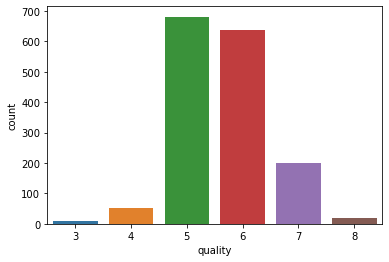

In [5]:
#count of the target variable
sns.countplot(x='quality', data=df)

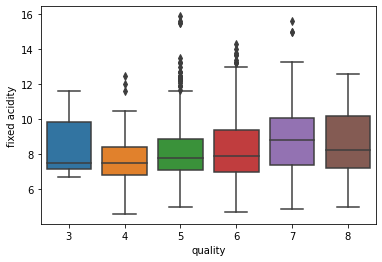

In [6]:
#Plot a boxplot to check for Outliers
#Target variable is Quality. So will plot a boxplot each column against target variable
sns.boxplot('quality', 'fixed acidity', data = df)

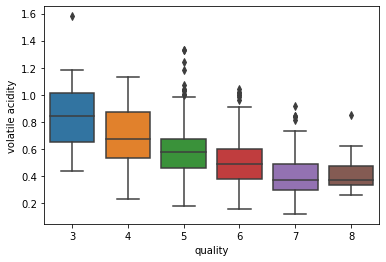

In [7]:
sns.boxplot('quality', 'volatile acidity', data = df)

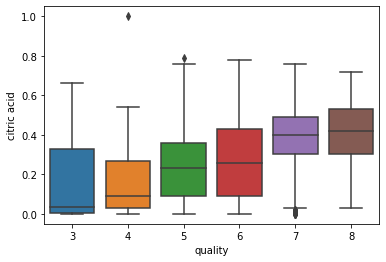

In [8]:
sns.boxplot('quality', 'citric acid', data = df)

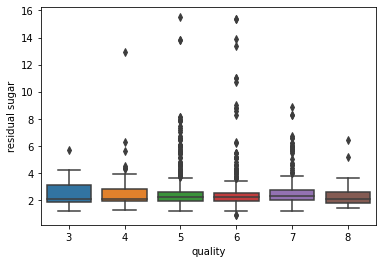

In [9]:
sns.boxplot('quality', 'residual sugar', data = df)

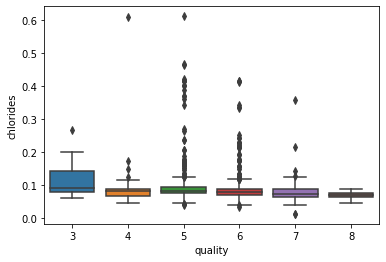

In [10]:
sns.boxplot('quality', 'chlorides', data = df)

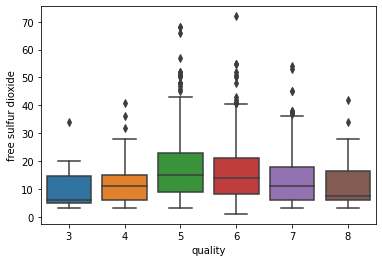

In [11]:
sns.boxplot('quality', 'free sulfur dioxide', data = df)

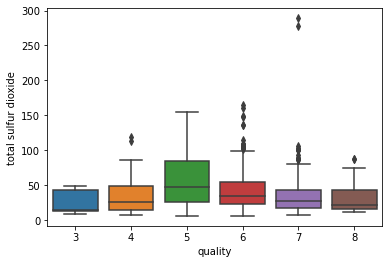

In [12]:
sns.boxplot('quality', 'total sulfur dioxide', data = df)

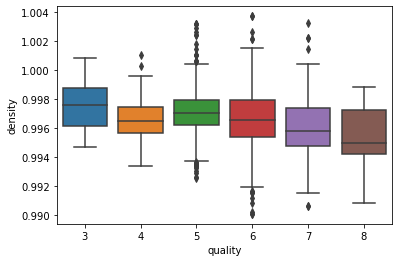

In [13]:
sns.boxplot('quality', 'density', data = df)

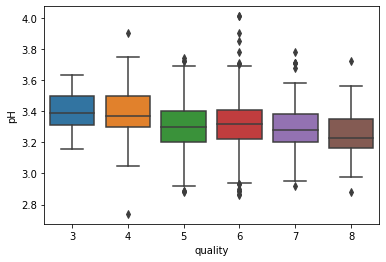

In [14]:
sns.boxplot('quality', 'pH', data = df)

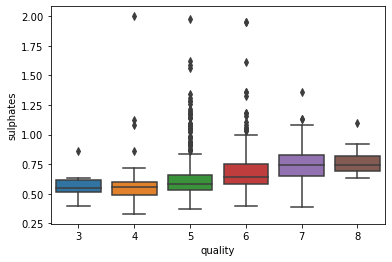

In [15]:
sns.boxplot('quality', 'sulphates', data = df)

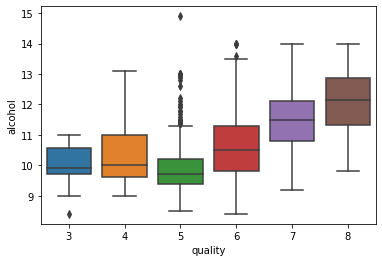

In [16]:
sns.boxplot('quality', 'alcohol', data = df)

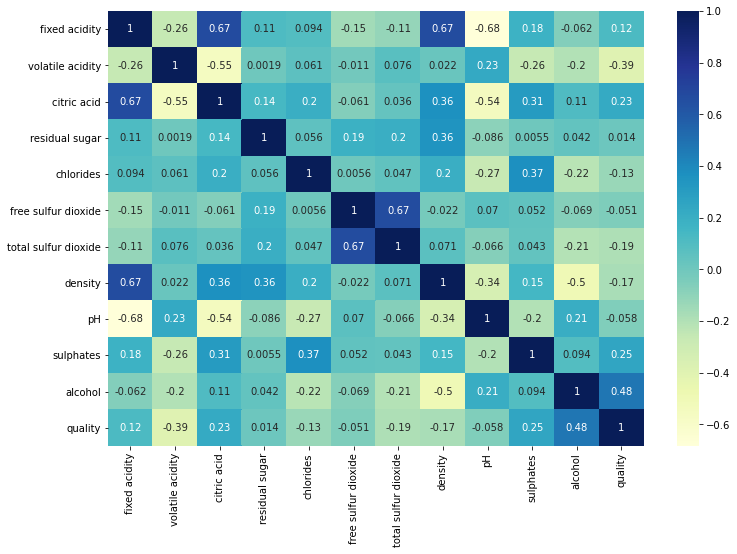

In [17]:
#Visualizing the correlation as heatmap plot
#citric acid and density are highly correlated with fixed acidity
#free sulfer dioxide with total sulfer dioxide
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [18]:
#boxplots show many outliers for quite a few columns. Describe the dataset to get a better idea on what's happening
df.describe()
#fixed acidity - 25% - 7.1 and 50% - 7.9. Not much of a variance. Could explain the huge number of outliers
#volatile acididty - similar reasoning
#citric acid - seems to be somewhat uniformly distributed
#residual sugar - min - 0.9, max - 15!! Waaaaay too much difference. Could explain the outliers.
#chlorides - same as residual sugar. Min - 0.012, max - 0.611
#free sulfur dioxide, total suflur dioxide - same explanation as above

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


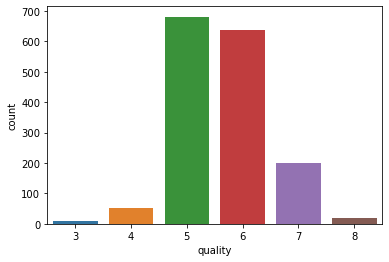

In [19]:
#count of the target variable
sns.countplot(x='quality', data=df)

In [20]:
#Basically the multi class classification problem has been converted to Binomial classification (2 classes)
#From above describe function average quality is 5.6
#And from the Count Plot, quality 5 and 6 are greater in numbers
#next we shall create a new column called Taste. This column will contain the values of 'bad' and 'good'. 
#Quality <= 5 are classified as 'Bad'
#Quality >= 6 are classified as 'Good'

In [21]:
#User defined function has been created to convert the quality to taste
def quality_conv(quality):
    if quality<=5:
        val='bad'
    elif quality>=6:
        val='good'
    return val

In [22]:
#User defined function has been called which will automatically convert the quality to taste
taste=[]
for i in df['quality']:
    taste.append(quality_conv(i))
df['taste']=taste

In [23]:
df.head(n=20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,taste
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,bad
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,bad
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,bad


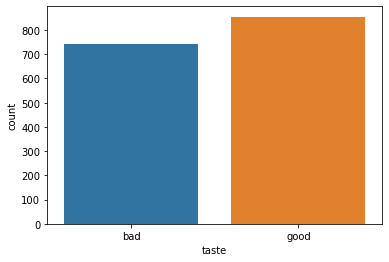

In [24]:
#count of the target variable
sns.countplot(x='taste', data=df)

In [25]:
#Splitting IV and DV
X=df.drop(['quality','taste'],axis=1)
y=df['taste']

In [26]:
#Splitting Train and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [27]:
#Scaling the Independent to a general scale value of 0 to 1 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Performing Cross Validation to select Best algorithm

In general there are two types of Cross Valildation Technique
    1. Leave One Out Cross Validation (LOOCV)
    2. KFold Cross Validation

1. Leave One Out Cross Validation (LOOCV)

    In LOOCV each row of data will go as the validation data for the model. 
    For e.g., if a data has 100 rows, 
    Step 1: Row1 will become as validation data and all other 99 rows will become as training data
    Step 2: Row2 will become as validation data and all other 99 rows will become as training data
    This process continues till all the row becomes as vaidation data
    
This Process is known as Leave one out cross validation.

2. KFold Cross Validaition

    In KFold cross Validation, the use has option to specify how many splits is required. If number of splits is specified as 10, which means at 
    Step 1: 10% percent of the data will become validation data and remaining 90% of the data will become as training data,   this process continues till all other 9 splits have become validation data.
    
This process is known as KFold Cross validation
        

In generall LOOCV requires more time in execution since the model has to be evaluated by leaving one row out. So, KFold cross validation is generally preferred.

In [29]:
#Kfold cross validation Random Forest
from numpy import mean
from sklearn.model_selection import KFold,cross_val_score
cv=KFold(n_splits=10,random_state=1,shuffle=True)
rf=RandomForestClassifier()
scores=cross_val_score(rf,X_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1)
print("CV Score From Random Forest: ", "%.2f" % mean(scores))

CV Score From Random Forest:  0.81


In [30]:
#Kfold cross validation Logistic regression
from numpy import mean
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C = 1e9)
cv=KFold(n_splits=10,random_state=1,shuffle=True)
lr=LogisticRegression()
scores=cross_val_score(lr,X_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1)
print("CV Score From Logistic Regression: ", "%.2f" %  mean(scores))

CV Score From Logistic Regression:  0.74


In [31]:
#Kfold cross validation Decision Tree
from numpy import mean
from sklearn.model_selection import KFold,cross_val_score
from sklearn import tree
cv=KFold(n_splits=10,random_state=1,shuffle=True)
dt=tree.DecisionTreeClassifier()
scores=cross_val_score(dt,X_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1)
print("CV Score From Decision Tree: ", "%.2f" %  mean(scores))

CV Score From Decision Tree:  0.76


In [32]:
#Kfold cross validation SVM
from numpy import mean
from sklearn.model_selection import KFold,cross_val_score
from sklearn.svm import SVC # "Support vector classifier"
cv=KFold(n_splits=10,random_state=1,shuffle=True)
svm=SVC()
scores=cross_val_score(svm,X_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1)
print("CV Score From SVM: ", "%.2f" %  mean(scores))

CV Score From SVM:  0.76


In [33]:
#Kfold cross validation KNN
from numpy import mean
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
cv=KFold(n_splits=10,random_state=1,shuffle=True)
knn=KNeighborsClassifier()
scores=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1)
print("CV Score From KNN: ", "%.2f" %  mean(scores))

CV Score From KNN:  0.72


In [34]:
#Kfold cross validation AdaBoost
from numpy import mean
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import AdaBoostClassifier
cv=KFold(n_splits=10,random_state=1,shuffle=True)
ada=AdaBoostClassifier()
scores=cross_val_score(ada,X_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1)
print("CV Score From AdaBoost: ", "%.2f" %  mean(scores))

CV Score From AdaBoost:  0.75


In [35]:
#Kfold cross validation Gradient Boosting
from numpy import mean
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
cv=KFold(n_splits=10,random_state=1,shuffle=True)
gb=GradientBoostingClassifier()
scores=cross_val_score(gb,X_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1)
print("CV Score From Graient Boosting: ", "%.2f" %  mean(scores))

CV Score From Graient Boosting:  0.79


In [36]:
#Kfold cross validation XGBoost
from numpy import mean
from sklearn.model_selection import KFold,cross_val_score
from xgboost import XGBClassifier
cv=KFold(n_splits=10,random_state=1,shuffle=True)
xgb=XGBClassifier()
scores=cross_val_score(xgb,X_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1)
print("CV Score From XG Boost: ", "%.2f" %  mean(scores))

CV Score From XG Boost:  0.81


In [37]:
#Kfold cross validation Naive Bayes
from numpy import mean
from sklearn.model_selection import KFold,cross_val_score
from sklearn.naive_bayes import GaussianNB
cv=KFold(n_splits=10,random_state=1,shuffle=True)
nb = GaussianNB()
scores=cross_val_score(nb,X_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1)
print("CV Score From Naive Bayes: ", "%.2f" %  mean(scores))

CV Score From Naive Bayes:  0.72


In [38]:
#From all the Algorithm the best CV Score is obtained for Random Forest model and XGBoost

# Using Grid Search to get the best parameters

In [39]:
#Using Grid Search to find the best param for the random forest model
#Please note this step will take more time to execute

from sklearn.model_selection import GridSearchCV

est=[500,1000,1500] 

fea=[2,3,4]

#Grid search will be performed for the each combination
#model one with est =500, fea=2
#model two with est=500, fea=3
#and so on

param_grid=dict(n_estimators=est,max_features=fea)

rfc = RandomForestClassifier()

grid=GridSearchCV(rfc,param_grid,scoring='accuracy',n_jobs=-1)

grid.fit(X_train,y_train)

print(grid.best_params_)

#using grid search, best params are n_est=500 and max_features=3

{'max_features': 2, 'n_estimators': 1000}


In [44]:
#From the above cross validation process, Random forest is performing better
rf=RandomForestClassifier(n_estimators=1000,max_features=2,n_jobs=-1,random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=1000, n_jobs=-1,
                       random_state=1)

In [45]:
train_prediction=rf.predict(X_train)
test_prediction=rf.predict(X_test)

In [46]:
train_prediction

array(['good', 'bad', 'good', ..., 'good', 'good', 'good'], dtype=object)

In [47]:
print("Train Score: ","\n")
print(pd.crosstab(y_train,train_prediction))
print("\n")
print(classification_report(y_train,train_prediction))
print("Test Score: ","\n")
print(pd.crosstab(y_test,test_prediction))
print("\n")
print(classification_report(y_test,test_prediction))

Train Score:  

col_0  bad  good
taste           
bad    551     0
good     0   568


              precision    recall  f1-score   support

         bad       1.00      1.00      1.00       551
        good       1.00      1.00      1.00       568

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119

Test Score:  

col_0  bad  good
taste           
bad    147    46
good    60   227


              precision    recall  f1-score   support

         bad       0.71      0.76      0.74       193
        good       0.83      0.79      0.81       287

    accuracy                           0.78       480
   macro avg       0.77      0.78      0.77       480
weighted avg       0.78      0.78      0.78       480



#For this Problem the random forest model seems to give the better Test accuracy
We can further improve accuracy by fine-tuning the parameters of each classifier.
Hope you found this explanation useful! 
Pleae leave in comments in case of any questions, concerns, and feedback! Thank you :) 